In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from scipy.io import loadmat
from unicodedata import normalize
filename = "/home/veronica/Desktop/UVM/mutation_signatures/datasets/breast_cancer_data.mat"
data = loadmat(filename, appendmat=False)
v = data["originalGenomes"]
types = data["types"]
l = len(types)
types_1 = [None] * l
for i in range(0, l):
    types_1[i] = normalize('NFKD', types[i][0][0]).encode('ascii','ignore')
X = v.T
print(X.shape)

(21, 96)


In [3]:
D_ours = np.load("/home/veronica/Desktop/UVM/mutation_signatures/"\
                "notebooks/breast25_ourMethod/belli 8 maggio/good_dictionary_ordered_8may.npy")
C_ours = np.load("/home/veronica/Desktop/UVM/mutation_signatures/"\
                "notebooks/breast25_ourMethod/belli 8 maggio/good_coefficients_8may.npy")

In [5]:
D_his = np.load("/home/veronica/Desktop/UVM/mutation_signatures/"\
                "notebooks/breast25_hisMethod/8may results/D_ordered_done_8may.npy")
C_his = np.load("/home/veronica/Desktop/UVM/mutation_signatures/"\
                "notebooks/breast25_hisMethod/8may results/coefficients_done_8may.npy")

In [41]:
errors_reconstruction_ours = []
for i in range(C_ours.shape[0]):
    error = np.linalg.norm(X[i,:] - C_ours[i,:].dot(D_ours))/np.linalg.norm(X[i,:])
   # error = np.linalg.norm(X[i,:] - C_ours[i,:].dot(D_ours))/np.linalg.norm(C_ours[i,:].dot(D_ours))
    errors_reconstruction_ours.append(error)

In [42]:
errors_reconstruction_his = []
for i in range(C_his.shape[0]):
    error = np.linalg.norm(X[i,:] - C_his[i,:].dot(D_his))/np.linalg.norm(X[i,:])
   # error = np.linalg.norm(X[i,:] - C_his[i,:].dot(D_his))/np.linalg.norm(C_his[i,:].dot(D_his))
    errors_reconstruction_his.append(error)

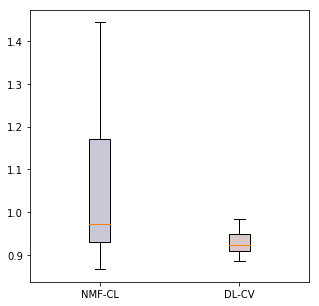

In [137]:
data = np.zeros((21,2)) 
data[:,1] = errors_reconstruction_ours
data[:,0] = errors_reconstruction_his

# basic plot
fig, ax = plt.subplots(figsize=(5,5))
box = plt.boxplot(data, 0, '',patch_artist=True)
#box = plt.boxplot(data, notch=True, patch_artist=True)
patches = box['boxes']
patches[1].set_facecolor((0.5, 0.294, 0.294, 0.3))
patches[0].set_facecolor((0.294, 0.294, 0.5, 0.3))
plt.rcParams['axes.facecolor'] = (0.294, 0.294, 0.5, 0)
ax.set_xticklabels(labels=["NMF-CL", "DL-CV"])
plt.show()

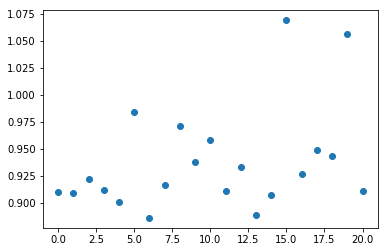

In [116]:
plt.plot(errors_reconstruction_ours, 'o')
plt.show()

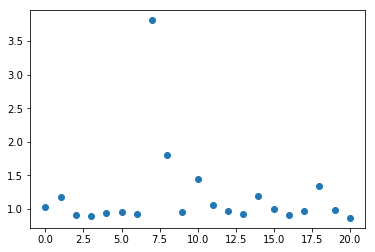

In [45]:
plt.plot(errors_reconstruction_his, 'o')
plt.show()

In [65]:
BICs = np.load("/home/veronica/Desktop/UVM/mutation_signatures/"\
                "notebooks/breast25_ourMethod/belli 8 maggio/good_BICs_8may.npy")
erros = np.load("/home/veronica/Desktop/UVM/mutation_signatures/"\
                "notebooks/breast25_hisMethod/8may results/errors_done_8may.npy")
stabilities = np.load("/home/veronica/Desktop/UVM/mutation_signatures/"\
                "notebooks/breast25_hisMethod/8may results/stabilities_done_8may.npy")

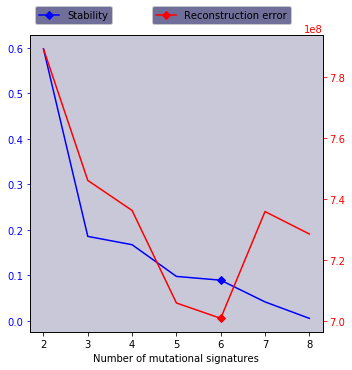

In [104]:
fig, ax1 = plt.subplots(figsize=(5,5))
markers_on = [4]
ax1.plot(np.arange(2,9), stabilities, '-bD', markevery=markers_on, label="Stability")
# Make the y-axis label, ticks and tick labels match the line color.
ax1.tick_params('y', colors='b')
ax1.set_xlabel('Number of mutational signatures')
ax2 = ax1.twinx()
ax2.plot(np.arange(2,9), erros, '-rD', markevery=markers_on, label="Reconstruction error")
ax2.tick_params('y', colors='r')

ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3)
ax2.legend(bbox_to_anchor=(0.4, 1.02, 1., .102), loc=3)
plt.rcParams['axes.facecolor'] = (0.294, 0.294, 0.5, 0.3)
fig.tight_layout()
plt.show()

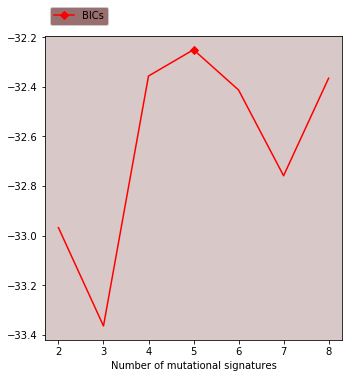

In [132]:
fig, ax1 = plt.subplots(figsize=(5,5))
markers_on = [3]
ax1.plot(np.arange(2,9), -BICs[0:7], '-rD', markevery=markers_on, label="BICs")
ax1.set_xlabel("Number of mutational signatures")
ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3)
plt.rcParams['axes.facecolor'] = (0.5, 0.294, 0.294, 0.3)
fig.tight_layout()
plt.show()